## 1.

## Plot.ly로 인터렉티브한 그래프 만들기
#### 바 그래프 버블 그래프 지도 그래프

In [5]:
#plotly는 실행 전 jupyter renderers를 미리 설치해야만 반응할 수 있음
#notebook, lab 에 따라 다를 수 있지만 대부분 매뉴얼대로 하면 인터렉티브한 그래프는 표시가 됨
# https://plotly.com/python/getting-started/

In [ ]:
  #깔아줌
!pip install jupyterlab "ipywidgets>=7.5"

#커맨드에서 다음 입력
#JupyterLab renderer support
#jupyter labextension install jupyterlab-plotly@4.14.3


     |████████████████████████████████| 8.3MB 6.7MB/s 
     |████████████████████████████████| 430kB 46.4MB/s 
     |████████████████████████████████| 194kB 47.4MB/s 
     |████████████████████████████████| 51kB 6.1MB/s 
     |████████████████████████████████| 71kB 8.5MB/s 
     |████████████████████████████████| 112kB 51.3MB/s 
     |████████████████████████████████| 61kB 7.8MB/s 
     |████████████████████████████████| 102kB 4.7MB/s 
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7667 sha256=56ce32ebc0a20d566b517164f8c1e378c7390c3acb9b5f8e5521fe7ba1e0654c
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built contextvars
ERROR: google-colab 1.0.0 has requirement tornado~=5.1.0; python_version >= "3.0", but you'll have tornado 6.1 which is incompatible.
  Found existing installation: tornado 5.1.1
    Uninstalling tornado-5.1.1:
      Successfully uninstalled tornado-5.1.1
  Found 

In [ ]:
# Plotly Graphing Library Fundamentals 중 graph objects & plotly express
# https://plotly.com/python/plotly-fundamentals/

import plotly.graph_objects as go
import plotly.express as px
import pandas as pd

### Plotly의 특이점
#### - Plotly 라이브러리는 자동적으로 JSON과 연동돼 Plotly.js JavaScript library로 렌더링됨
#### - 모든 자료가 hover labeling, 간단한 애니메이션 지원됨
#### - 이때 'Graph Objects'모듈은 파이썬 클래스들을 미리 포함하여 생성됨 메인 클래스가 'Figure'
#### - '명령어'(?)들은 중재 코드 없이 바로 나올 수 있게 직관적으로 구성됨 예) layout_title_text, go.Figure(layout_title_text="The Title")) 
#### 기존 파이썬 그래프 작성할 때 사용하는 딕셔너리에 비해 간단함 dict(layout=dict(title=dict(text="The Title")))
#### - Figure는 딕셔너리와 비슷한 기능을 하나 축약된 명령어와 사용방법으로 아주 간단한다

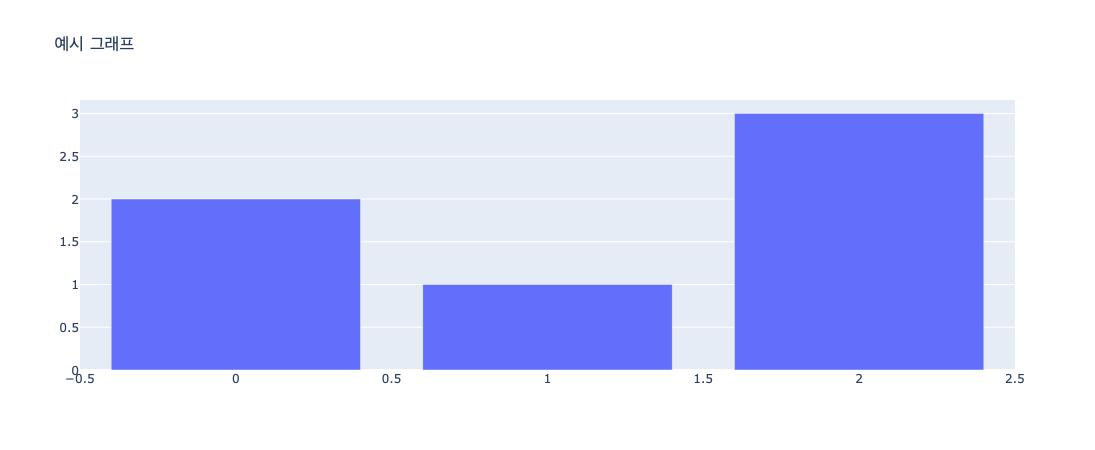

In [ ]:
#바그래프
fig = go.Figure(data=[go.Bar(y=[2, 1, 3])], layout_title_text="예시 그래프")

fig

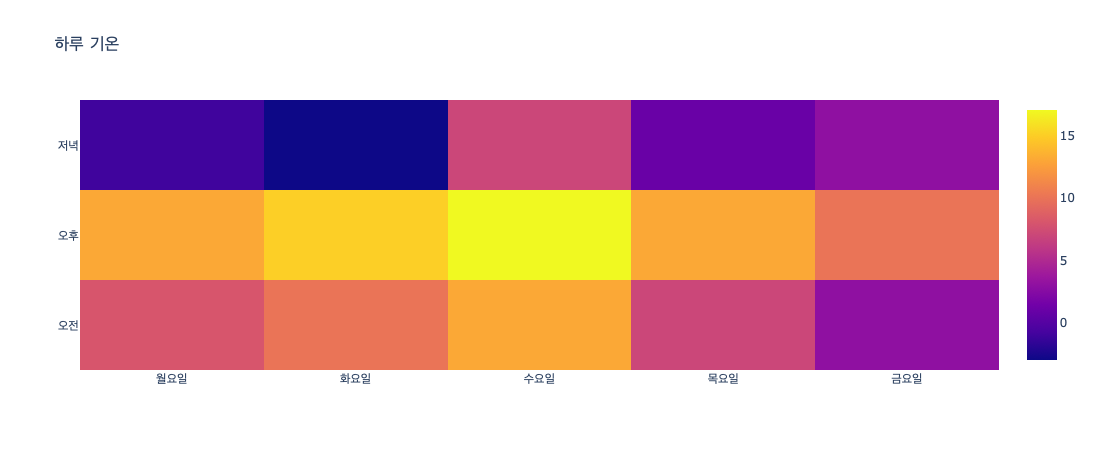

In [ ]:
#히트맵

data1 = go.Heatmap(z=[[8, 10, 13, 7, 3], [13, 15, 17, 13, 10], [-1, -3, 7, 1, 3]],
                   x=['월요일', '화요일', '수요일', '목요일', '금요일'],
                   y=['오전', '오후', '저녁'])
data2=[data1]
layout = go.Layout(title='하루 기온')

figure = go.Figure(data=data2, layout=layout)

f2 = go.Figure(figure)
f2

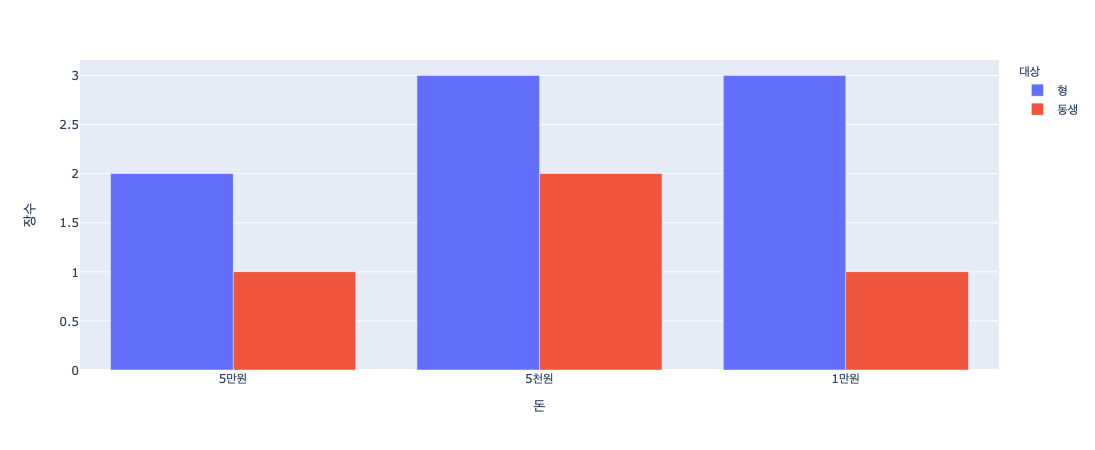

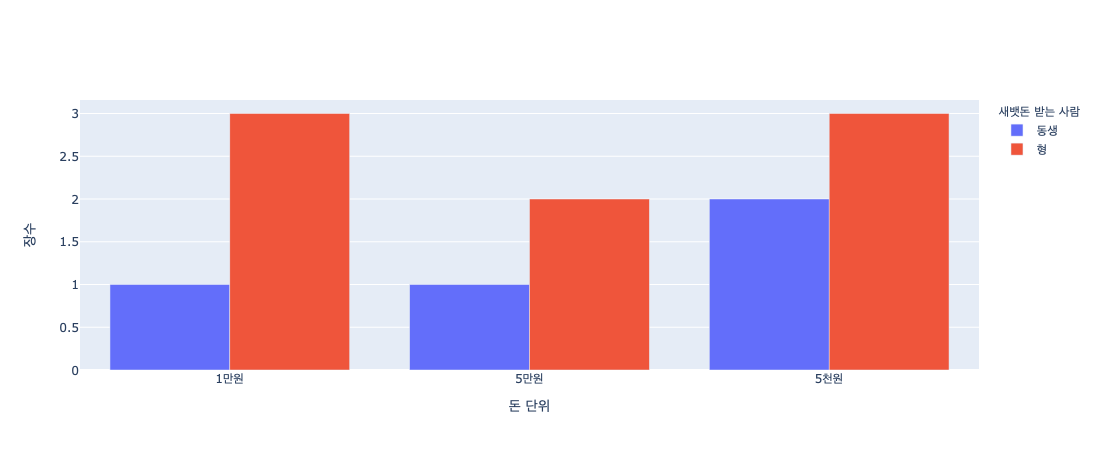

In [ ]:
df = pd.DataFrame({
  "돈": ["5만원", "1만원", "5천원", "5만원", "1만원", "5천원"],
  "대상": ["형", "동생", "형", "동생", "형", "동생"],
  "장수": [2, 1, 3, 1, 3, 2],
})

#plotly express로 색상을 바로 변수 이름을 넣어 지정해줌

fig3 = px.bar(df, x="돈", y="장수", color="대상", barmode="group")
fig3.show()


fig3 = go.Figure()
for contestant, group in df.groupby("대상"):
    fig3.add_trace(go.Bar(x=group["돈"], y=group["장수"], name=contestant,
      hovertemplate="Contestant=%s<br>Fruit=%%{x}<br>Number Eaten=%%{y}<extra></extra>"% contestant))
fig3.update_layout(legend_title_text = "새뱃돈 받는 사람")
fig3.update_xaxes(title_text="돈 단위")
fig3.update_yaxes(title_text="장수")
fig3.show()

# Plotly Express - 더 고퀄 그래프 생성 가능

## Plotly Express 지원 30가지 그래프 종류
### 모두 single function call로 불러오기 가능
###### 장점은 모두 어느정도 애니메이션이 가능, figure 레이블링이 자동적, 모두 hover labeling 지원, plot.ly express 하나로 모든 라이브러리 불러오기
##### https://plotly.github.io/plotly.py-docs/generated/plotly.express.html

<ul>
<li>Basics: scatter, line, area, bar, funnel, timeline</li>
<li>Part-of-Whole: pie, sunburst, treemap, funnel_area</li>
<li>1D Distributions: histogram, box, violin, stripe</li>
<li>2D Distributions: density_heatmap, density_contour</li>
<li>Matrix Input: imshow</li>
<li>3-Dimensional: scatter_3d, line_3d</li>
<li>Multidimensional: scatter_matrix, parallel_coordinates, parallel_categories</li>
<li>Tile Maps: scatter_mapbox, line_mapbox, choropleth_mapbox, density_mapbox
<li>Outline Maps: scatter_geo, line_geo, choropleth</li>
<li>Polar Charts: scatter_polar, line_polar, bar_polar</li>
<li> Ternary Charts: scatter_ternary, line_ternary</li>
</ul>

#### 1. 데이터 불러오기

In [ ]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import numpy as np

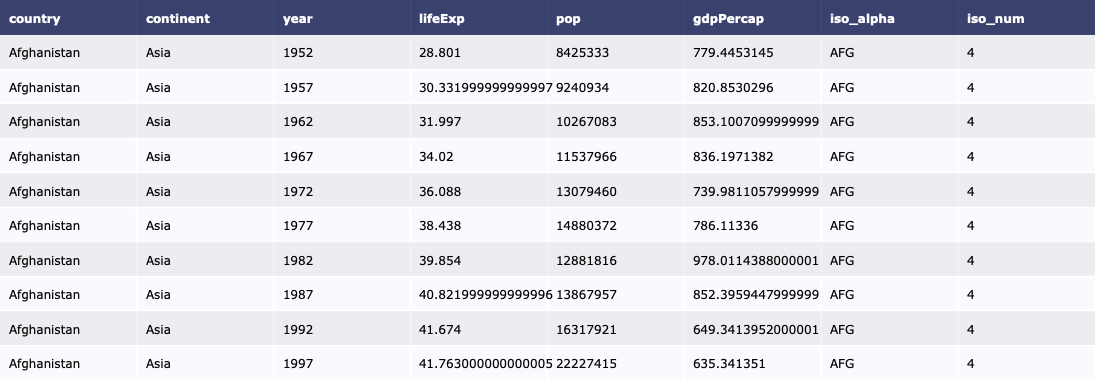

In [ ]:
from plotly.figure_factory import create_table
#import plotly.express as px

# 테이블표 만드는 패키지가 또 따로 있나봄
# gapminder이라는 원래 있는 데이터셋 불러오기 .data
gapminder = px.data.gapminder()

table = create_table(gapminder.head(10))
py.iplot(table)

In [ ]:
type(gapminder)

pandas.core.frame.DataFrame

In [ ]:
gapminder.dtypes

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
iso_alpha     object
iso_num        int64
dtype: object

#### 2. 그래프 생성하기

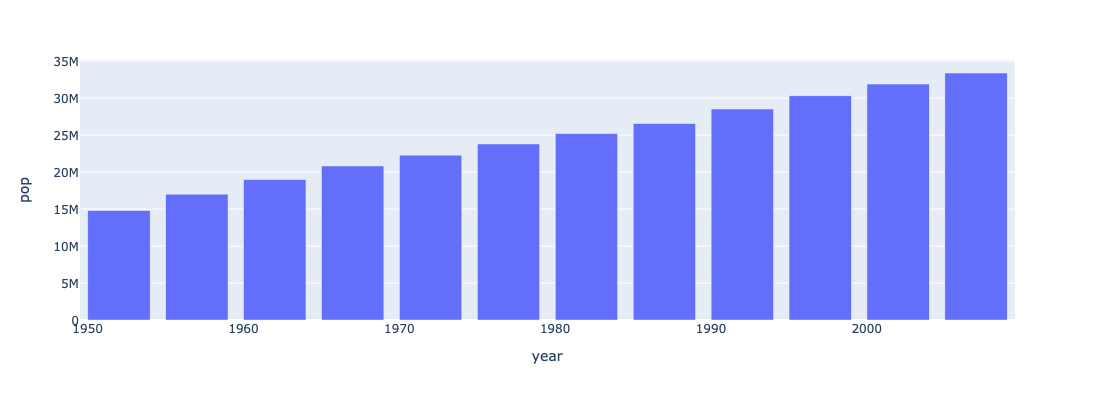

In [ ]:
#캐나다에 해당하는 연도별 인구수 비교
data_canada = px.data.gapminder().query("country == 'Canada'")
fig = px.bar(data_canada, x='year', y='pop', height=400)
fig.show()

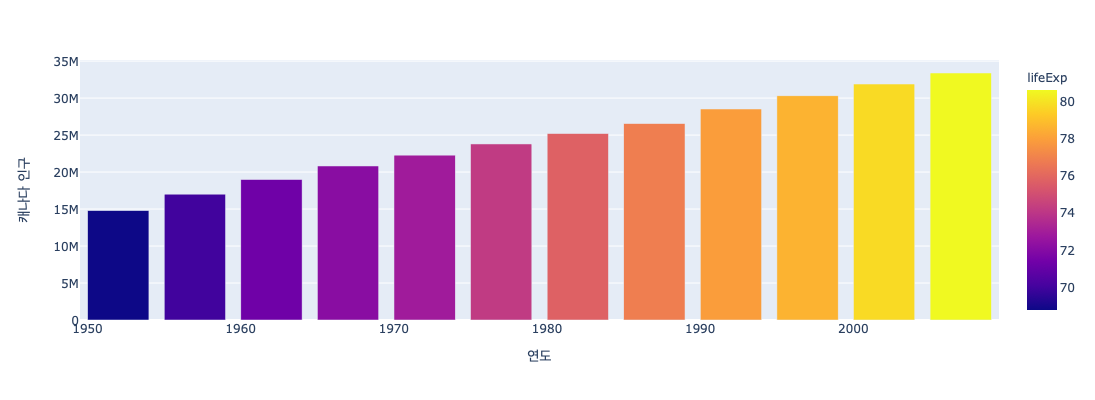

In [ ]:
#색상넣기: 단순히 color 에 원하는 변수를 넣으면 됨
#따로 레이블 바 생성할 필요 x
#hover_data 에 상세 표기되었으면 하는 변수 추가 

fig = px.bar(data_canada, x='year', y='pop',
             hover_data=['lifeExp', 'gdpPercap'], color='lifeExp',
             labels={'pop':'캐나다 인구', 'year':'연도'}, height=400)
fig.show()

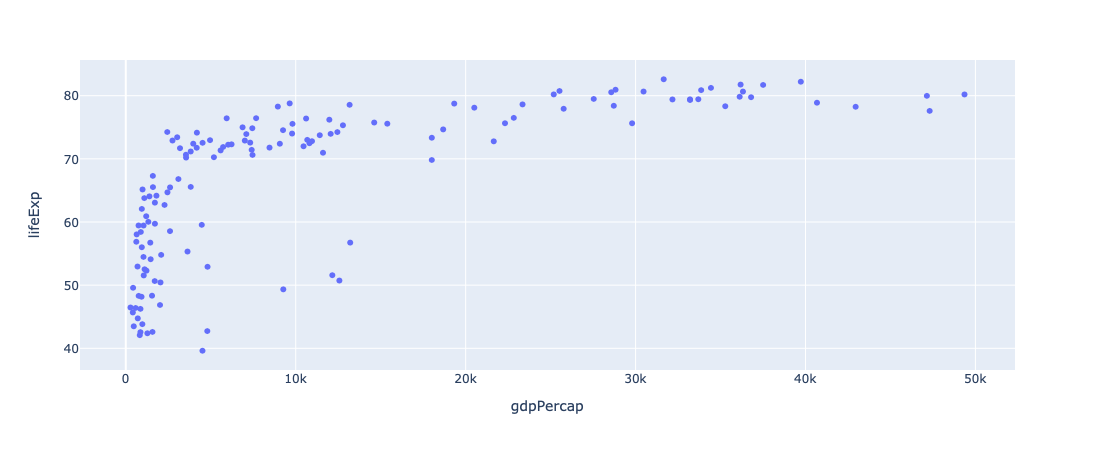

In [ ]:
#scatter graph lifeexp VS gdp

gapminder2007 = gapminder.query("year == 2007")

#단순히 scatter 패키지 입력
px.scatter(gapminder2007, x="gdpPercap", y="lifeExp")

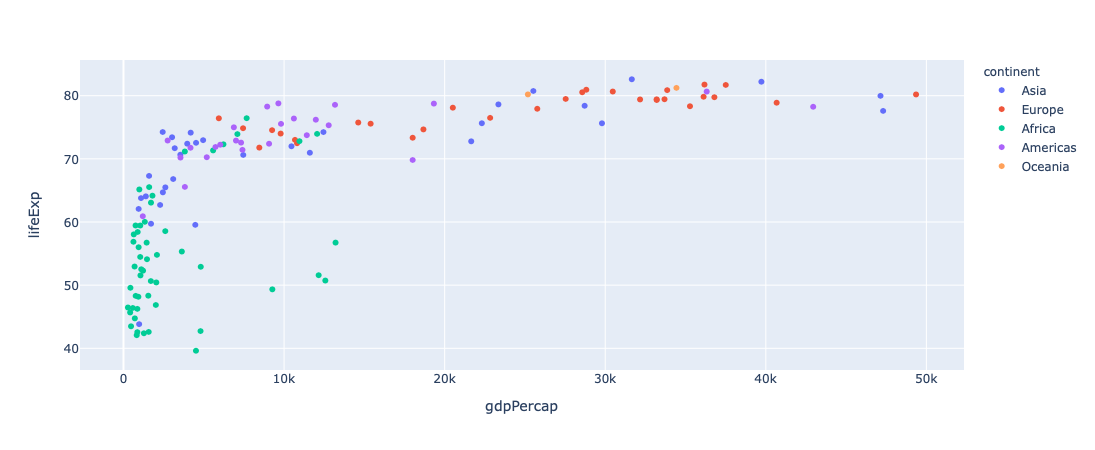

In [ ]:
#색상 부분에 'continent' 넣으면 대륙별로 색상 달라지는 것 확인

px.scatter(gapminder2007, x="gdpPercap", y="lifeExp", color="continent")

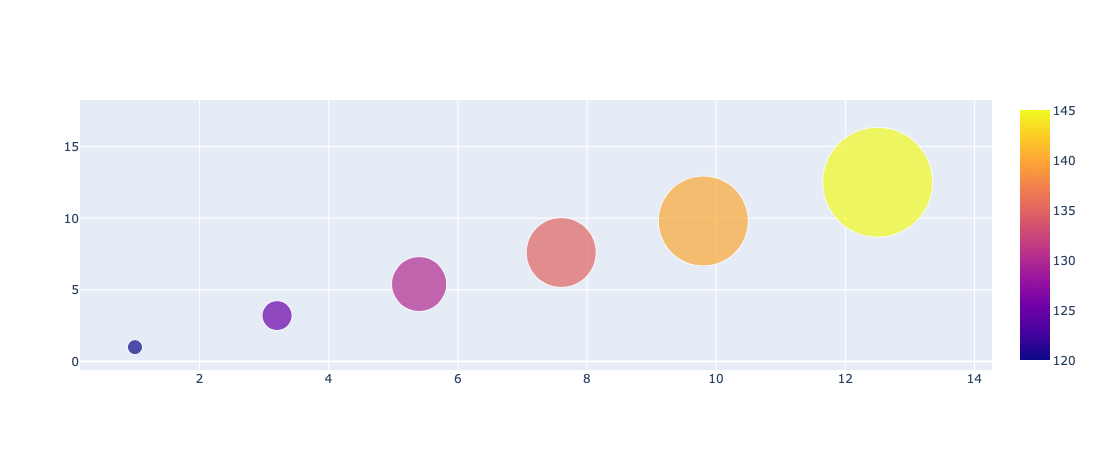

In [ ]:
#markers 커스터마이징

fig = go.Figure(data=[go.Scatter(
    x=[1, 3.2, 5.4, 7.6, 9.8, 12.5],
    y=[1, 3.2, 5.4, 7.6, 9.8, 12.5],
    mode='markers',
    marker=dict(
        color=[120, 125, 130, 135, 140, 145],
        size=[15, 30, 55, 70, 90, 110],
        showscale=True
        )
)])

fig.show()

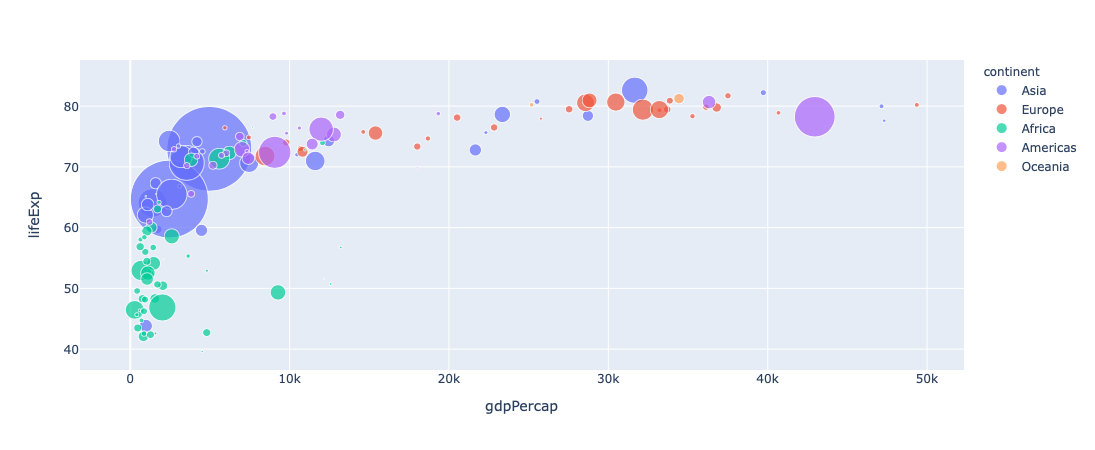

In [ ]:
# 버블 차트 생성
# 사이즈 또한 인구 별로 자동 설정 size ='pop'

px.scatter(gapminder2007, x="gdpPercap", y="lifeExp", color="continent", size="pop", size_max=60)

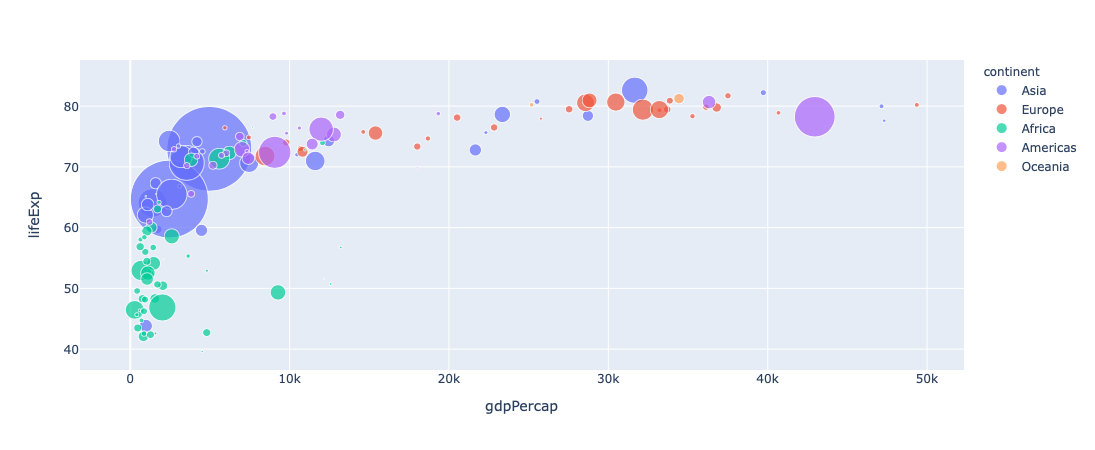

In [ ]:
# 버블 hover시 나라 이름 표시

px.scatter(gapminder2007, x="gdpPercap", y="lifeExp", color="continent", size="pop", size_max=60, hover_name="country")

#### 3. 애니메이션 추가하기

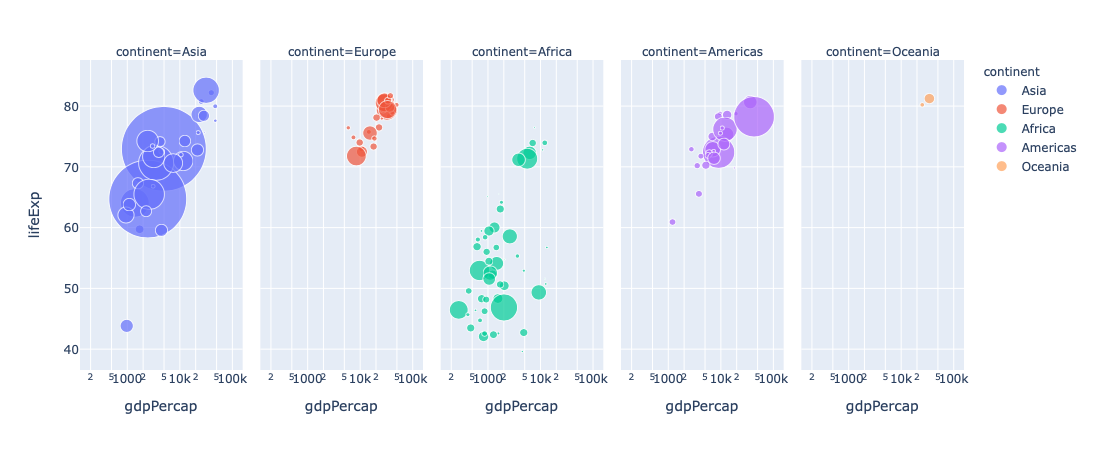

In [ ]:
px.scatter(gapminder2007, x="gdpPercap", y="lifeExp", color="continent", size="pop", size_max=60,
          hover_name="country", facet_col="continent", log_x=True)

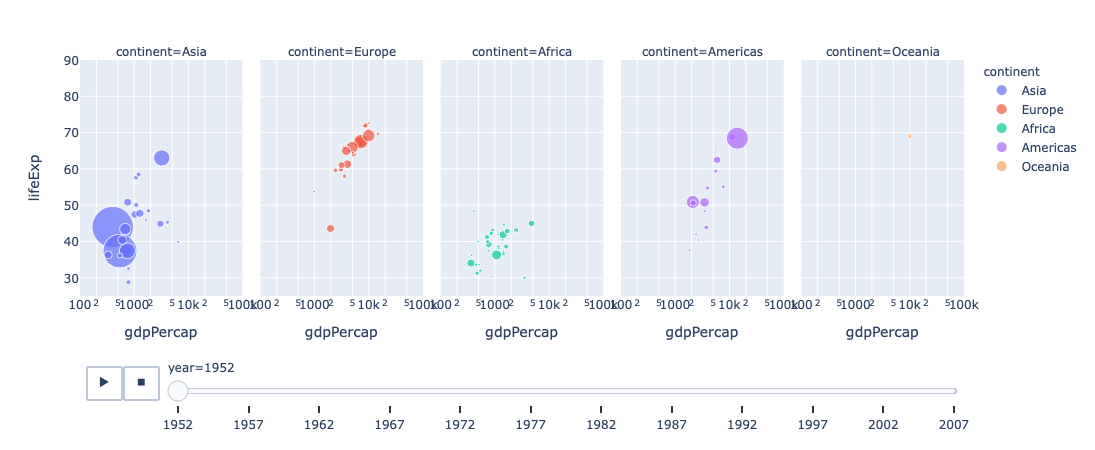

In [ ]:
#애니메이션 추가- 단순히 animation_frame 과 움직일 animation_group만 설정하면 됨
# gdp 범위와 lifeexp 범위 설정

fig = px.scatter(gapminder, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country", facet_col="continent",
           log_x=True, size_max=45, range_x=[100,100000], range_y=[25,90])
fig.show()

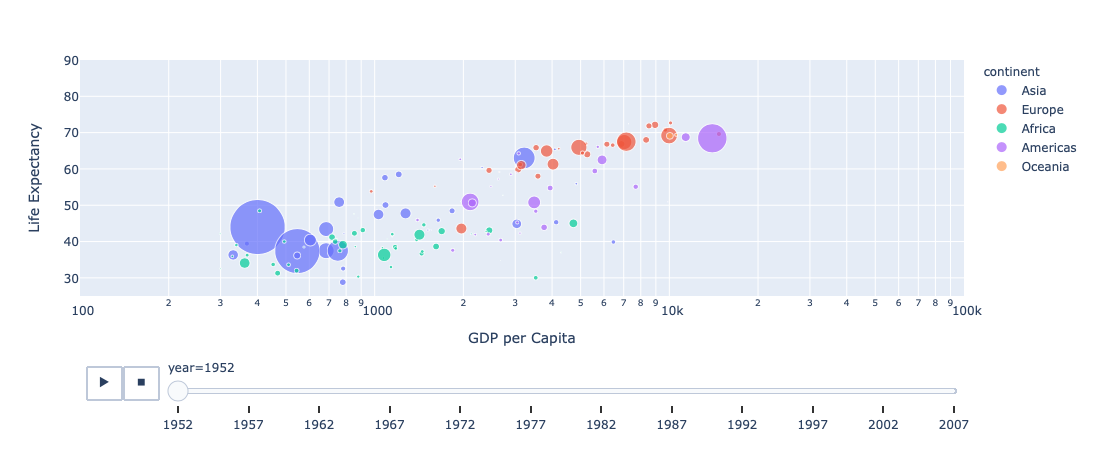

In [ ]:
# dic으로 모아서 보기
px.scatter(gapminder, x="gdpPercap", y="lifeExp",size="pop", size_max=60, color="continent", hover_name="country",
           animation_frame="year", animation_group="country", log_x=True, range_x=[100,100000], range_y=[25,90],
           labels=dict(pop="Population", gdpPercap="GDP per Capita", lifeExp="Life Expectancy"))

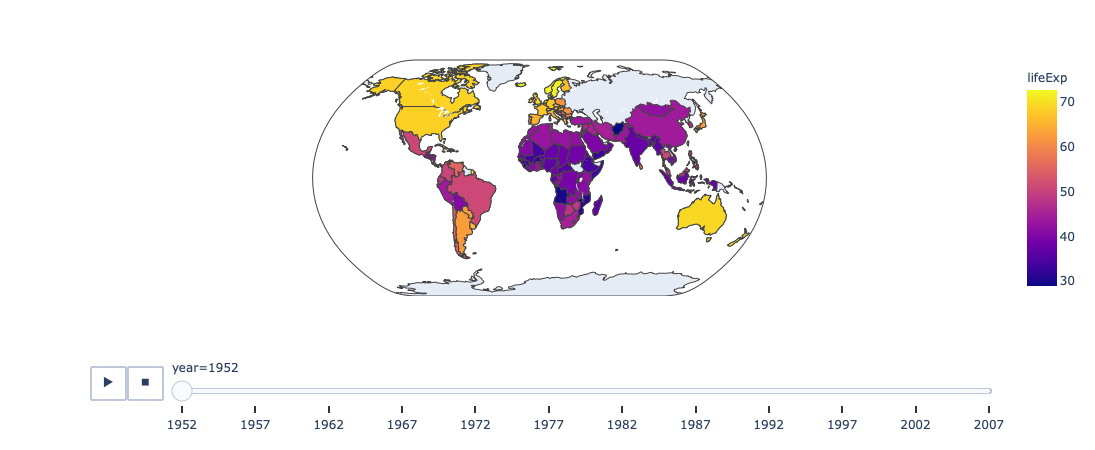

In [ ]:
# choropleth 지도화

px.choropleth(gapminder, locations="iso_alpha", color="lifeExp", hover_name="country", animation_frame="year",
              color_continuous_scale=px.colors.sequential.Plasma, projection="natural earth")

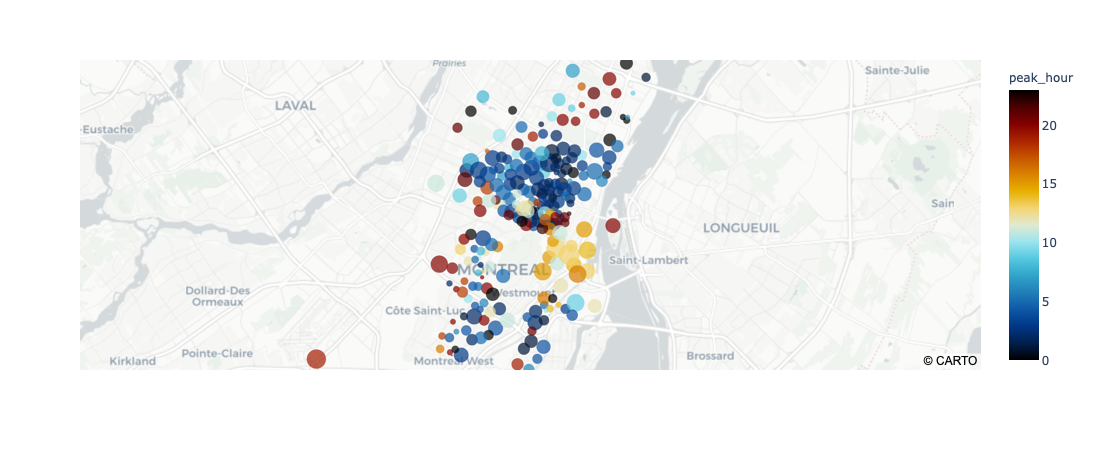

In [ ]:
import plotly.express as px
df = px.data.carshare()
fig = px.scatter_mapbox(df, lat="centroid_lat", lon="centroid_lon", color="peak_hour", size="car_hours",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10,
                  mapbox_style="carto-positron")
fig.show()

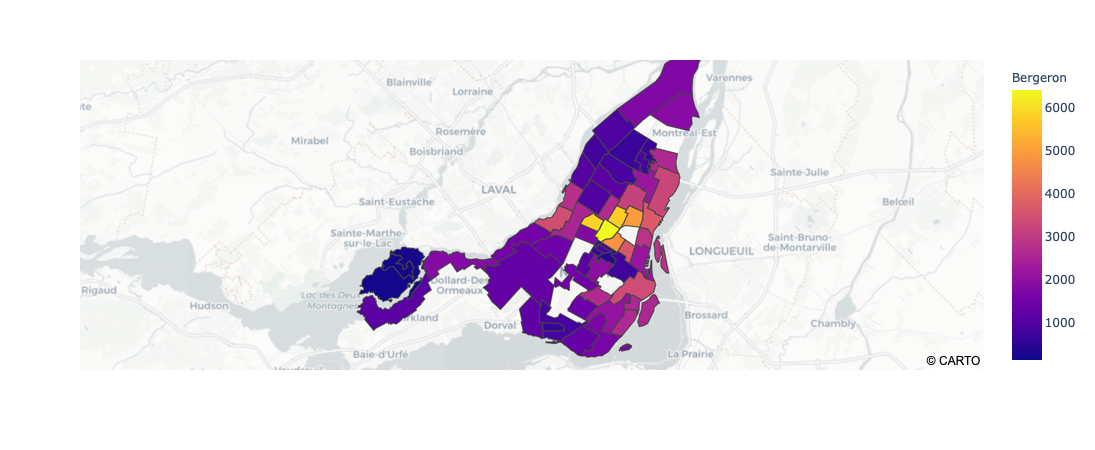

In [ ]:
import plotly.express as px

df = px.data.election()
geojson = px.data.election_geojson()

fig = px.choropleth_mapbox(df, geojson=geojson, color="Bergeron",
                           locations="district", featureidkey="properties.district",
                           center={"lat": 45.5517, "lon": -73.7073},
                           mapbox_style="carto-positron", zoom=9)
fig.show()

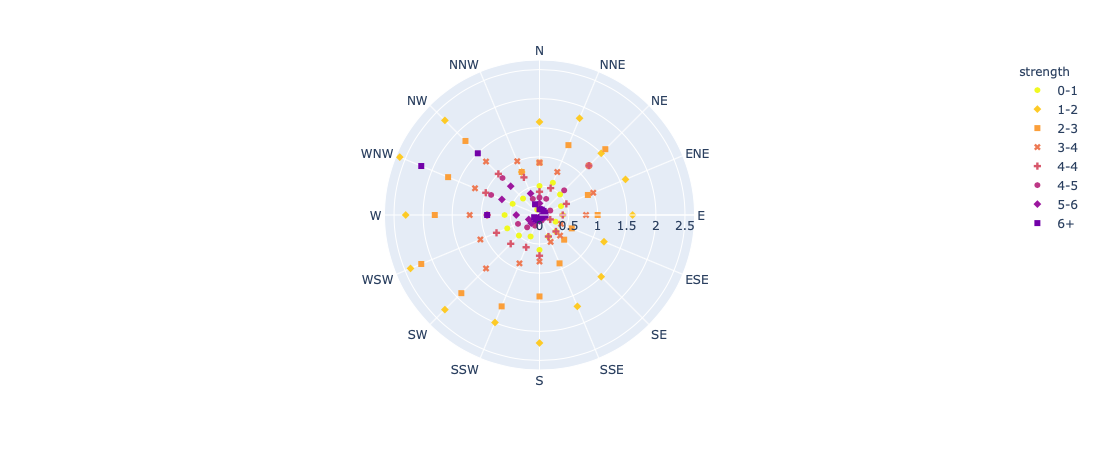

In [ ]:
import plotly.express as px
df = px.data.wind()
fig = px.scatter_polar(df, r="frequency", theta="direction", color="strength", symbol="strength",
            color_discrete_sequence=px.colors.sequential.Plasma_r)
fig.show()

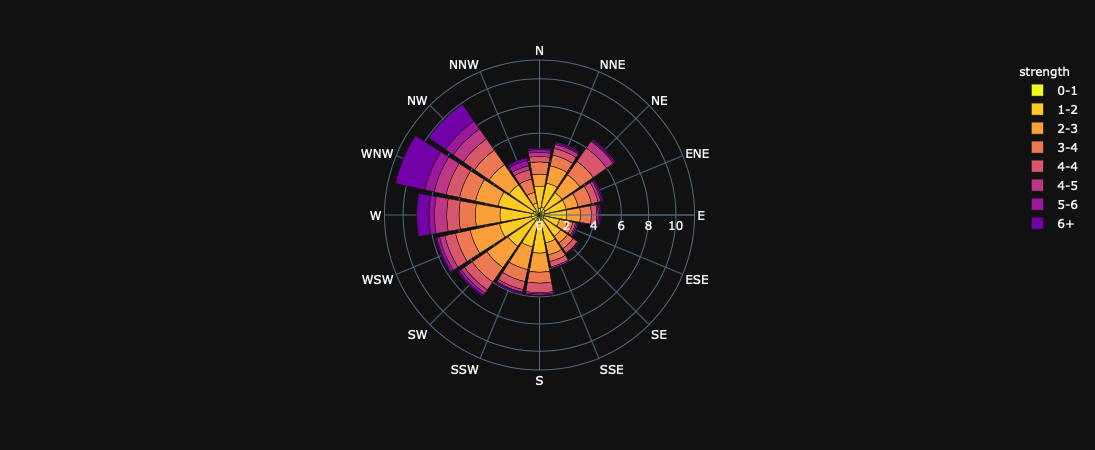

In [ ]:
import plotly.express as px
df = px.data.wind()
fig = px.bar_polar(df, r="frequency", theta="direction", color="strength", template="plotly_dark",
            color_discrete_sequence= px.colors.sequential.Plasma_r)
fig.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import pandas as pd

# read in volcano database data
df = pd.read_csv(
    "https://raw.githubusercontent.com/plotly/datasets/master/volcano_db.csv",
    encoding="iso-8859-1",
)

# frequency of Country
freq = df
freq = freq.Country.value_counts().reset_index().rename(columns={"index": "x"})

# read in 3d volcano surface data
df_v = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/volcano.csv")

# Initialize figure with subplots
fig = make_subplots(
    rows=2, cols=2,
    column_widths=[0.6, 0.4],
    row_heights=[0.4, 0.6],
    specs=[[{"type": "scattergeo", "rowspan": 2}, {"type": "bar"}],
           [            None                    , {"type": "surface"}]])

# Add scattergeo globe map of volcano locations
fig.add_trace(
    go.Scattergeo(lat=df["Latitude"],
                  lon=df["Longitude"],
                  mode="markers",
                  hoverinfo="text",
                  showlegend=False,
                  marker=dict(color="crimson", size=4, opacity=0.8)),
    row=1, col=1
)

# Add locations bar chart
fig.add_trace(
    go.Bar(x=freq["x"][0:10],y=freq["Country"][0:10], marker=dict(color="crimson"), showlegend=False),
    row=1, col=2
)

# Add 3d surface of volcano
fig.add_trace(
    go.Surface(z=df_v.values.tolist(), showscale=False),
    row=2, col=2
)

# Update geo subplot properties
fig.update_geos(
    projection_type="orthographic",
    landcolor="white",
    oceancolor="MidnightBlue",
    showocean=True,
    lakecolor="LightBlue"
)

# Rotate x-axis labels
fig.update_xaxes(tickangle=45)

# Set theme, margin, and annotation in layout
fig.update_layout(
    template="plotly_dark",
    margin=dict(r=10, t=25, b=40, l=60),
    annotations=[
        dict(
            text="Source: NOAA",
            showarrow=False,
            xref="paper",
            yref="paper",
            x=0,
            y=0)
    ]
)

fig.show()